<a href="https://colab.research.google.com/github/cnniranjan72/Autonomous-Landmine-detector/blob/main/MineClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Land mines.csv to Land mines (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("Land mines.csv")
print(df.head())


          V         H  S  M
0  0.338157  0.000000  1  1
1  0.320241  0.181818  1  1
2  0.287009  0.272727  1  1
3  0.256284  0.454545  1  1
4  0.262840  0.545455  1  1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.47058823529411764

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.92      0.92      0.92        12
           2       0.41      0.44      0.42        16
           3       0.29      0.45      0.36        11
           4       0.27      0.17      0.21        18

    accuracy                           0.47        68
   macro avg       0.49      0.50      0.49        68
weighted avg       0.47      0.47      0.46        68



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.2f}")


Decision Tree Accuracy: 0.47
Random Forest Accuracy: 0.53
SVM Accuracy: 0.28
Logistic Regression Accuracy: 0.38


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())



Cross-validation scores: [0.55882353 0.42647059 0.58823529 0.55223881 0.59701493]
Average accuracy: 0.5445566286215979


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train again if not already done
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Now predict on a sample
sample = [[0.35, 0.5, 3]]  # Example V, H, S
prediction = clf.predict(sample)

mine_types = {
    1: "Null (No Mine)",
    2: "Anti-Tank",
    3: "Anti-Personnel",
    4: "Booby-Trapped Anti-Personnel",
    5: "M14 Anti-Personnel"
}

print("Predicted Mine Type (numeric):", prediction[0])
print("Predicted Mine Type (label):", mine_types[prediction[0]])


Predicted Mine Type (numeric): 1
Predicted Mine Type (label): Null (No Mine)


In [ ]:
# Interactive input
V = float(input("Enter Voltage (V): "))
H = float(input("Enter Height (H): "))
S = int(input("Enter Soil Type (1-6): "))

sample = [[V, H, S]]
pred = clf.predict(sample)

print("Predicted Mine Type:", mine_types[pred[0]])


Enter Voltage (V): 0.3
Enter Height (H): 0.5
Enter Soil Type (1-6): 5
Predicted Mine Type: Null (No Mine)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset again
df = pd.read_csv("Land mines.csv")

# Split features and labels
X = df[['V', 'H', 'S']]
y = df['M']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Check accuracy
y_pred = clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.5294117647058824


In [ ]:
# =========================
# 📌 Step 1: Upload Dataset
# =========================
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Upload CSV file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Land mines.csv")
print("✅ Dataset Loaded Successfully!")
print(df.head())

# ==============================
# 📌 Step 2: Prepare Data
# ==============================
X = df[["V", "H", "S"]]   # Features
y = df["M"]               # Target (Mine Type)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# 📌 Step 3: Train Model
# ==============================
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
y_pred = clf.predict(X_test)
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ==============================
# 📌 Step 4: Predict New Sample
# ==============================
mine_types = {
    1: "Anti-Personnel",
    2: "Anti-Tank",
    3: "Fragmentation",
    4: "Directional",
    5: "Bounding"
}

print("\n🔮 Enter new values to predict mine type:")
V = float(input("Enter Voltage (V): "))
H = float(input("Enter Height (H): "))
S = int(input("Enter Soil Type (1-6): "))

sample = [[V, H, S]]
pred = clf.predict(sample)

print("\n✅ Predicted Mine Type (numeric):", pred[0])
print("✅ Predicted Mine Type (label):", mine_types[pred[0]])


Saving Land mines.csv to Land mines (2).csv
✅ Dataset Loaded Successfully!
          V         H  S  M
0  0.338157  0.000000  1  1
1  0.320241  0.181818  1  1
2  0.287009  0.272727  1  1
3  0.256284  0.454545  1  1
4  0.262840  0.545455  1  1

🎯 Accuracy: 0.5294117647058824

📊 Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.85      0.92      0.88        12
           3       0.43      0.38      0.40        16
           4       0.36      0.45      0.40        11
           5       0.36      0.22      0.28        18

    accuracy                           0.53        68
   macro avg       0.52      0.58      0.54        68
weighted avg       0.51      0.53      0.51        68


🔮 Enter new values to predict mine type:
Enter Voltage (V): 0.2
Enter Height (H): 0.3
Enter Soil Type (1-6): 1

✅ Predicted Mine Type (numeric): 5
✅ Predicted Mine Type (label): Bounding


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


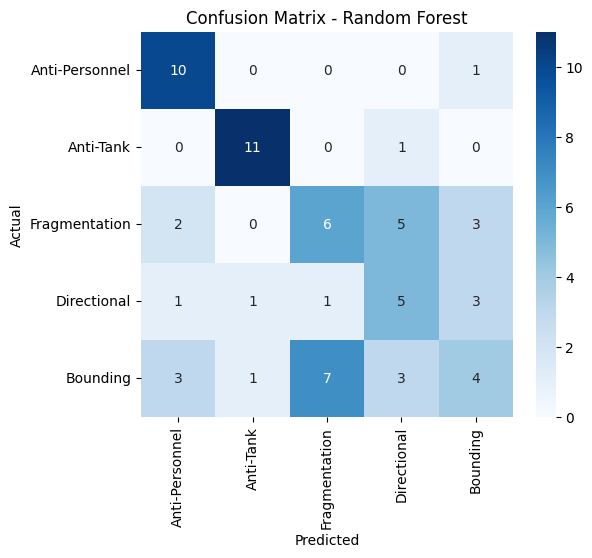

/tmp/ipython-input-4218637057.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


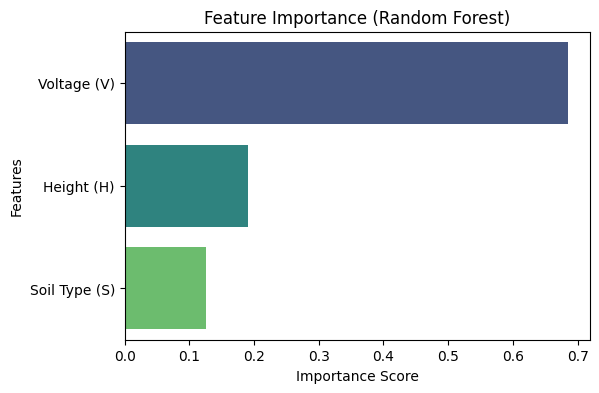

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 🔹 1. Confusion Matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=mine_types.values(),
            yticklabels=mine_types.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# 🔹 2. Feature Importance
importances = clf.feature_importances_
features = ["Voltage (V)", "Height (H)", "Soil Type (S)"]

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
import joblib
joblib.dump(clf, "landmine_model.pkl")


['landmine_model.pkl']

In [ ]:
!pip install xgboost

In [ ]:
# Map back to original mine labels (1–5)
mine_types = {
    0: "Anti-Personnel",
    1: "Anti-Tank",
    2: "Fragmentation",
    3: "Blast",
    4: "Bounding"
}

# Example input
sample = [[0.35, 0.5, 3]]
pred = xgb_clf.predict(sample)

print("✅ Predicted Mine Type (numeric):", pred[0] + 1)  # shift back
print("✅ Predicted Mine Type (label):", mine_types[pred[0]])


✅ Predicted Mine Type (numeric): 5
✅ Predicted Mine Type (label): Bounding


In [ ]:
# Reload dataset (if not already loaded in memory)
import pandas as pd

df = pd.read_csv("Land mines.csv")

# Define features and target again
X = df[["V", "H", "S"]]   # features
y = df["M"]               # target (mine type)

# Train/test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("Land mines.csv")

# Features & target
X = df[["V", "H", "S"]]
y = df["M"] - 1   # shift classes to start at 0

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_clf = XGBClassifier(
    objective="multi:softmax",
    num_class=len(y.unique()),
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

# Train
xgb_clf.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test)

# Metrics
print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:37:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 XGBoost Accuracy: 0.5441176470588235

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.85      0.92      0.88        12
           2       0.47      0.44      0.45        16
           3       0.33      0.45      0.38        11
           4       0.46      0.33      0.39        18

    accuracy                           0.54        68
   macro avg       0.55      0.57      0.56        68
weighted avg       0.54      0.54      0.54        68



📊 Model Comparison Table:
                 Model  Accuracy
0        Decision Tree      0.47
1        Random Forest      0.53
2                  SVM      0.28
3  Logistic Regression      0.38
4              XGBoost      0.54


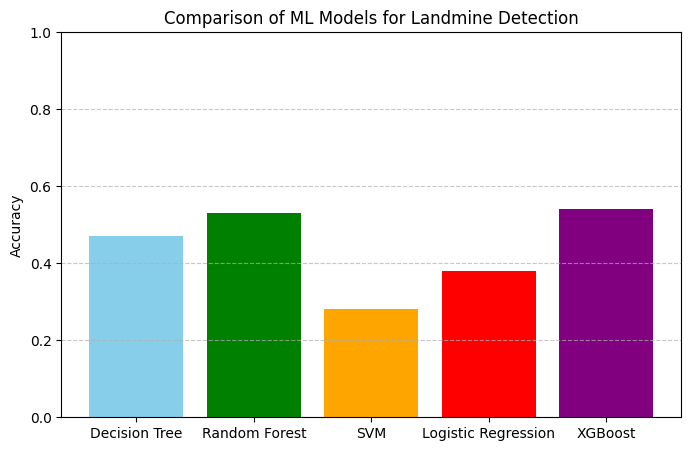

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Accuracies you got earlier
results = {
    "Decision Tree": 0.47,
    "Random Forest": 0.53,
    "SVM": 0.28,
    "Logistic Regression": 0.38,
    "XGBoost": 0.54
}

# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Show table
print("📊 Model Comparison Table:")
print(results_df)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=["skyblue","green","orange","red","purple"])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Comparison of ML Models for Landmine Detection")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


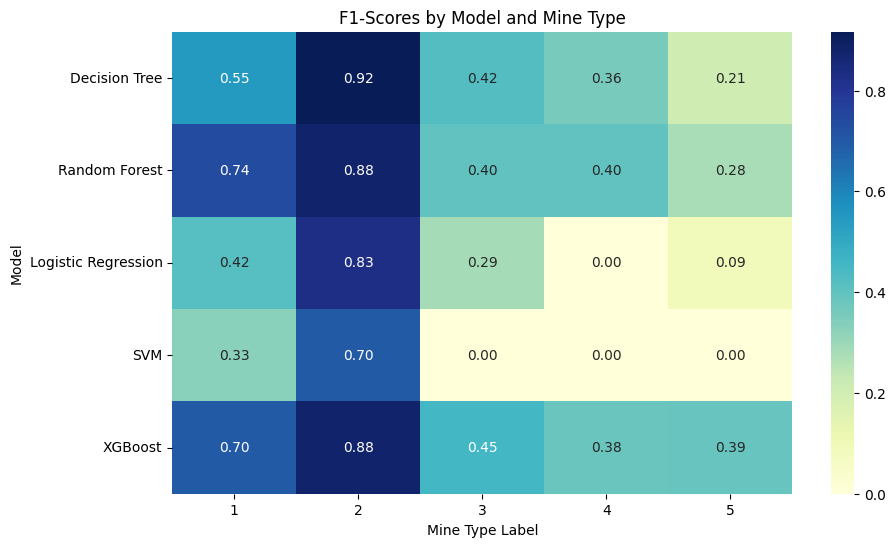

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Store reports for each model
reports = {}

# Decision Tree
# Ensure dt_clf is defined and fitted
if 'dt_clf' not in locals():
    from sklearn.tree import DecisionTreeClassifier
    dt_clf = DecisionTreeClassifier(random_state=42)
    dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
reports["Decision Tree"] = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)

# Random Forest
# Ensure rf_clf is defined and fitted
if 'rf_clf' not in locals():
    from sklearn.ensemble import RandomForestClassifier
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
reports["Random Forest"] = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# Logistic Regression
# Ensure lr_clf is defined and fitted
if 'lr_clf' not in locals():
    from sklearn.linear_model import LogisticRegression
    lr_clf = LogisticRegression(max_iter=1000, random_state=42)
    lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
reports["Logistic Regression"] = classification_report(y_test, y_pred_lr, output_dict=True, zero_division=0)

# SVM
# Ensure svm_clf is defined and fitted
if 'svm_clf' not in locals():
    from sklearn.svm import SVC
    svm_clf = SVC(random_state=42)
    svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
reports["SVM"] = classification_report(y_test, y_pred_svm, output_dict=True, zero_division=0)

# XGBoost
# Ensure xgb_clf is defined and fitted, and labels are shifted for training
if 'xgb_clf' not in locals():
    from xgboost import XGBClassifier
    xgb_clf = XGBClassifier(objective="multi:softmax", num_class=len(y.unique()), eval_metric="mlogloss", use_label_encoder=False, random_state=42)
    y_train_xgb = y_train - 1
    xgb_clf.fit(X_train, y_train_xgb)

y_pred_xgb_shifted = xgb_clf.predict(X_test)
# Shift predictions back for the classification report
y_pred_xgb = y_pred_xgb_shifted + 1
reports["XGBoost"] = classification_report(y_test, y_pred_xgb, output_dict=True, zero_division=0)


# Extract F1-scores for each class and model
# Get class labels from the keys of one of the reports (excluding accuracy, macro avg, weighted avg)
classes = [key for key in next(iter(reports.values())).keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

heatmap_data = []

for model, report in reports.items():
    row = [report[cls]["f1-score"] for cls in classes]
    heatmap_data.append(row)

heatmap_data = np.array(heatmap_data)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", xticklabels=classes, yticklabels=reports.keys(), fmt=".2f")
plt.xlabel("Mine Type Label") # Updated label to reflect the actual labels used
plt.ylabel("Model")
plt.title("F1-Scores by Model and Mine Type")
plt.show()

In [ ]:
# For XGBoost only, shift labels from [1,2,3,4,5] → [0,1,2,3,4]
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Train XGBoost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(objective="multi:softmax", num_class=5, eval_metric="mlogloss", random_state=42)
xgb_clf.fit(X_train, y_train_xgb)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Convert predictions back to original 1–5 labels
y_pred_xgb = y_pred_xgb + 1


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

# GridSearch
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

# Train best model
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.5444444444444445
Test Accuracy: 0.5


In [ ]:
import numpy as np

# Shift labels (1 → 0, 2 → 1, ..., 5 → 4)
y_train_shifted = y_train - np.min(y_train)
y_test_shifted = y_test - np.min(y_test)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="multi:softmax", num_class=5, eval_metric="mlogloss", random_state=42)

param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_xgb = RandomizedSearchCV(
    xgb, param_dist, n_iter=20, scoring="accuracy", cv=5,
    random_state=42, n_jobs=-1, verbose=1
)

random_xgb.fit(X_train, y_train_shifted)

print("Best Parameters:", random_xgb.best_params_)
print("Best CV Accuracy:", random_xgb.best_score_)

best_xgb = random_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test_shifted, y_pred_best_xgb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV Accuracy: 0.5814814814814815
Test Accuracy: 0.5147058823529411
